In [282]:
# Standard DS imports
import pandas as pd
import numpy as np

# Vizualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# NLP imports
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud

# Custom imports
import acquire as a
import env

import os
import requests
import random

## Acquire

In [283]:
df = a.process_all_repos()

In [284]:
df.head()

Unnamed: 0                                      repo language  \
0           0          /facebookresearch/ResponsibleNLP   Python   
1           1       /facebookresearch/projectaria_tools      C++   
2           2   /facebookresearch/HolisticTraceAnalysis   Python   
3           3                /facebookresearch/fairseq2   Python   
4           4  /facebookresearch/seamless_communication   Python   

                                     readme_contents  
0  This repository hosts code and datasets relati...  
1  # Project Aria Tools

Project Aria Tools is a ...  
2  [![CircleCI](https://circleci.com/gh/facebookr...  
3  <p align="center">
  <img src="doc/static/img/...  
4  ![](seamlessM4T.png)
# SeamlessM4T
SeamlessM4T...

## Prepare

##### Prepare Steps:
- Lowercase All Text
- Remove accented characters and non-ASCII characters
- Remove special characters
- Tokenize
- Lemmatize
- Remove Stopwords
- Add extra Stopwords

In [285]:
df = a.transform_data(df, extra_stopwords=['githubcom', "'"])

In [286]:
df.head()

Unnamed: 0                                      repo language  \
0           0          /facebookresearch/ResponsibleNLP   Python   
1           1       /facebookresearch/projectaria_tools      C++   
2           2   /facebookresearch/HolisticTraceAnalysis   Python   
3           3                /facebookresearch/fairseq2   Python   
4           4  /facebookresearch/seamless_communication   Python   

                                            original  \
0  This repository hosts code and datasets relati...   
1  # Project Aria Tools

Project Aria Tools is a ...   
2  [![CircleCI](https://circleci.com/gh/facebookr...   
3  <p align="center">
  <img src="doc/static/img/...   
4  ![](seamlessM4T.png)
# SeamlessM4T
SeamlessM4T...   

                                               clean  \
0  repository hosts code datasets relating respon...   
1  project aria tools project aria tools suite c ...   
2  circlecihttps circlecicom gh facebookresearch ...   
3  p aligncenter img srcdoc static img logopng wi...   
4  seamlessm4tpng seamlessm4t seamlessm4t designe...   

                                           lematized  
0  repository host code datasets relating respons...  
1  project aria tool project aria tool suite c py...  
2  circlecihttps circlecicom gh appcirclecicom pi...  
3  p aligncenter img srcdoc static img logopng wi...  
4  seamlessm4tpng seamlessm4t seamlessm4t designe...

## Explore

In [287]:
py_words = ' '.join(df[df.language == 'Python'].lematized)
c_words = ' '.join(df[df.language == 'C++'].lematized)
mark_words = ' '.join(df[df.language == 'Markdown'].lematized)
all_words = ' '.join(df.lematized)

In [288]:
# Get word counts for each language
py_counts =pd.Series(py_words.split()).value_counts()
c_counts =pd.Series(c_words.split()).value_counts()
mark_counts =pd.Series(mark_words.split()).value_counts()
all_counts =pd.Series(all_words.split()).value_counts()

In [289]:
py_counts.sum()

392130

In [290]:
all_counts

model           6459
data            3908
python          3783
file            3159
training        2953
                ... 
evaldict           1
dllogger           1
dlloggergit        1
aqlaboratory       1
openreview         1
Name: count, Length: 46823, dtype: int64

In [291]:
# Get word frequencies for each language
py_freq =pd.Series(py_words.split()).value_counts(normalize=True)* 100
c_freq = pd.Series(c_words.split()).value_counts(normalize=True)* 100
mark_freq = pd.Series(mark_words.split()).value_counts(normalize=True)* 100
all_freq = pd.Series(all_words.split()).value_counts(normalize=True)* 100

In [292]:
# What are the most frequent py words?
py_counts.head(20)

model       5601
python      3270
data        3232
training    2629
file        2503
run         2282
code        2099
td          2072
use         1992
1           1987
dataset     1830
install     1805
license     1675
&#9;        1470
example     1440
using       1425
script      1405
train       1386
http        1322
image       1287
Name: count, dtype: int64

In [293]:
# What are the most frequent c words?
c_counts.head(20)

install      158
model        152
build        144
example      141
game         138
1            124
use          123
python       119
file         118
run          115
c            112
x            101
data         101
see           96
habitat       84
0             82
training      81
cd            80
following     78
bash          76
Name: count, dtype: int64

In [294]:
# What are the most frequent Markdown words?
mark_counts.head(20)

data           156
dataset        134
file           118
contains        88
license         81
participant     80
directory       66
session         56
user            56
audio           55
1               51
model           51
system          45
language        44
paper           43
frame           42
video           41
pose            39
microphone      38
used            35
Name: count, dtype: int64

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b>
    
- Words like 
- Words like 
</div>

In [295]:
all_counts

model           6459
data            3908
python          3783
file            3159
training        2953
                ... 
evaldict           1
dllogger           1
dlloggergit        1
aqlaboratory       1
openreview         1
Name: count, Length: 46823, dtype: int64

In [296]:
#Combine the value counts into one dataframe
word_counts = pd.concat([py_counts, c_counts, mark_counts, all_counts], axis=1)
word_counts.columns = ['py_counts', 'c_counts', 'mark_counts', 'all_counts']

# Fill the nulls with 0
word_counts.fillna(0, inplace=True)
#Recast all columns as integers
word_counts = word_counts.astype('int')

#take a look
word_counts.head()

py_counts  c_counts  mark_counts  all_counts
model          5601       152           51        6459
python         3270       119            6        3783
data           3232       101          156        3908
training       2629        81           19        2953
file           2503       118          118        3159

In [297]:
#Combine the value counts into one dataframe
word_freq = pd.concat([py_freq, c_freq, mark_freq, all_freq], axis=1)
word_freq.columns = ['py_freq', 'c_freq', 'mark_freq', 'all_freq']

# Fill the nulls with 0
word_freq.fillna(0, inplace=True)

#take a look
word_freq.head()

py_freq    c_freq  mark_freq  all_freq
model     1.428353  0.687876   0.522916  1.317491
python    0.833907  0.538535   0.061520  0.771647
data      0.824216  0.457076   1.599508  0.797144
training  0.670441  0.366566   0.194812  0.602346
file      0.638309  0.534009   1.209884  0.644365

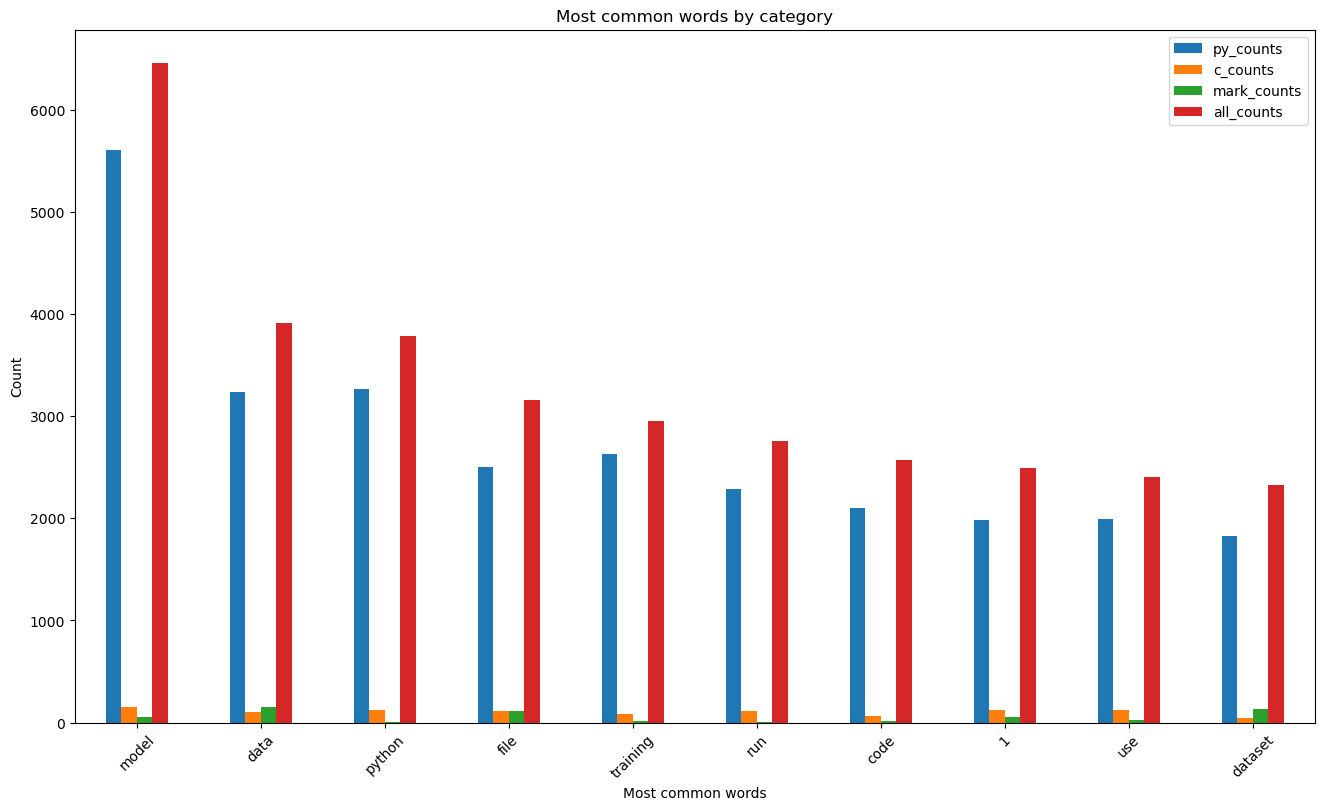

In [298]:
#Plot the most frequent words and color by label
word_counts.sort_values('all_counts', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

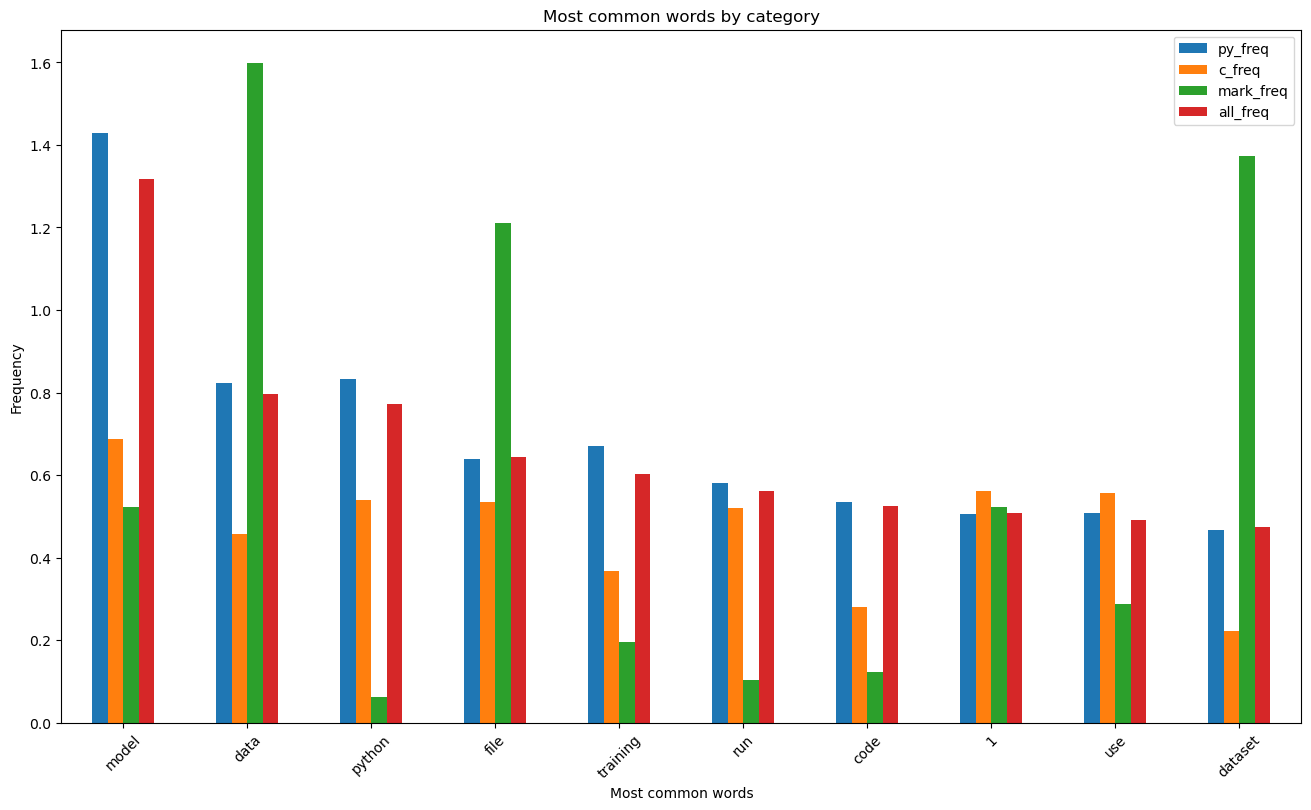

In [299]:
#Plot the most frequent words and color by label
word_freq.sort_values('all_freq', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Frequency')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

In [300]:
# Create dataframe with the word counts and frequencies for each language
words = pd.concat([word_counts, word_freq], axis=1)

In [301]:
# Look at the highest percent python words
words.sort_values('py_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  all_counts   py_freq    c_freq  \
model          5601       152           51        6459  1.428353  0.687876   
python         3270       119            6        3783  0.833907  0.538535   
data           3232       101          156        3908  0.824216  0.457076   
training       2629        81           19        2953  0.670441  0.366566   
file           2503       118          118        3159  0.638309  0.534009   
run            2282       115           10        2755  0.581950  0.520433   
code           2099        62           12        2572  0.535282  0.280581   
td             2072         0            0        2181  0.528396  0.000000   
use            1992       123           28        2405  0.507995  0.556637   
1              1987       124           51        2494  0.506720  0.561162   

          mark_freq  all_freq  
model      0.522916  1.317491  
python     0.061520  0.771647  
data       1.599508  0.797144  
training   0.194812  0.602346  
file       1.209884  0.644365  
run        0.102533  0.561958  
code       0.123039  0.524630  
td         0.000000  0.444875  
use        0.287091  0.490566  
1          0.522916  0.508720

In [302]:
# Look at the highest percent c words
words.sort_values('c_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  all_counts   py_freq    c_freq  \
install       1805       158            7        2304  0.460307  0.715029   
model         5601       152           51        6459  1.428353  0.687876   
build          230       144            6         516  0.058654  0.651672   
example       1440       141           10        1848  0.367225  0.638096   
game            75       138            1         282  0.019126  0.624519   
1             1987       124           51        2494  0.506720  0.561162   
use           1992       123           28        2405  0.507995  0.556637   
python        3270       119            6        3783  0.833907  0.538535   
file          2503       118          118        3159  0.638309  0.534009   
run           2282       115           10        2755  0.581950  0.520433   

         mark_freq  all_freq  
install   0.071773  0.469964  
model     0.522916  1.317491  
build     0.061520  0.105252  
example   0.102533  0.376951  
game      0.010253  0.057522  
1         0.522916  0.508720  
use       0.287091  0.490566  
python    0.061520  0.771647  
file      1.209884  0.644365  
run       0.102533  0.561958

In [303]:
# Look at the highest percent markdown words
words.sort_values('mark_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  all_counts   py_freq    c_freq  \
data              3232       101          156        3908  0.824216  0.457076   
dataset           1830        49          134        2326  0.466682  0.221750   
file              2503       118          118        3159  0.638309  0.534009   
contains           558        31           88         818  0.142300  0.140291   
license           1675        74           81        2211  0.427154  0.334887   
participant         22         0           80         114  0.005610  0.000000   
directory          678        25           66         878  0.172902  0.113138   
user               302        51           56         497  0.077015  0.230801   
session             33         0           56          93  0.008416  0.000000   
audio              272        11           55         402  0.069365  0.049781   

             mark_freq  all_freq  
data          1.599508  0.797144  
dataset       1.373936  0.474452  
file          1.209884  0.644365  
contains      0.902286  0.166854  
license       0.830514  0.450994  
participant   0.820260  0.023253  
directory     0.676715  0.179092  
user          0.574182  0.101377  
session       0.574182  0.018970  
audio         0.563929  0.081999

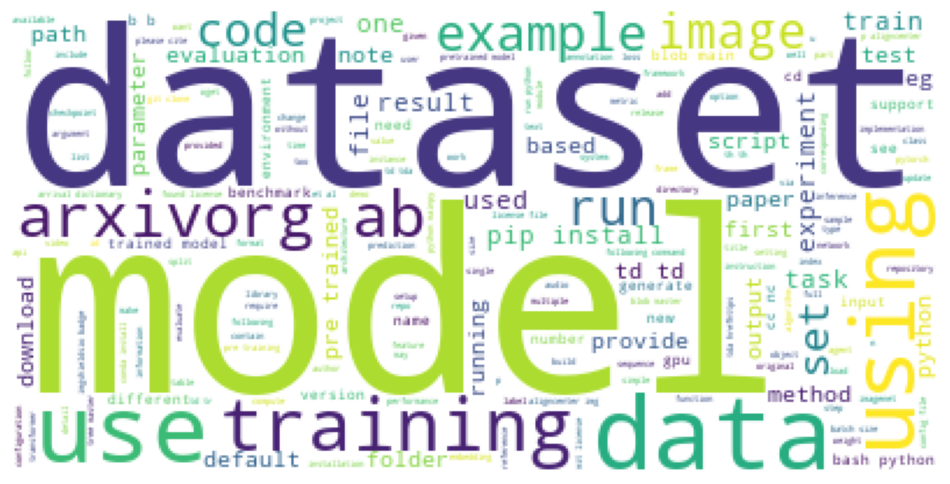

In [304]:
# Word Cloud for All words
all_cloud = WordCloud(background_color='white').generate(all_words)
plt.figure(figsize=(12, 8))
plt.imshow(all_cloud)
plt.axis('off')
plt.show()

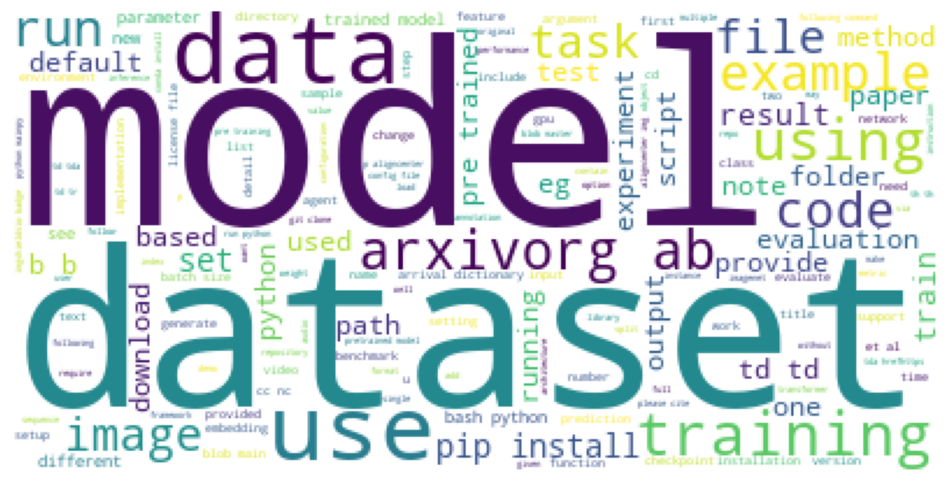

In [305]:
# Word Cloud for Python words
py_cloud = WordCloud(background_color='white').generate(py_words)
plt.figure(figsize=(12, 8))
plt.imshow(py_cloud)
plt.axis('off')
plt.show()


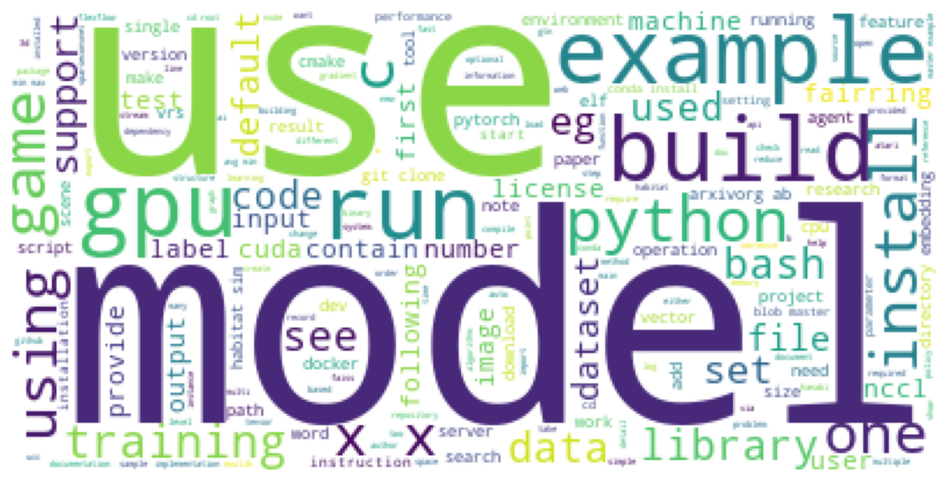

In [306]:
# Word Cloud for C words
c_cloud = WordCloud(background_color='white').generate(c_words)
plt.figure(figsize=(12, 8))
plt.imshow(c_cloud)
plt.axis('off')
plt.show()

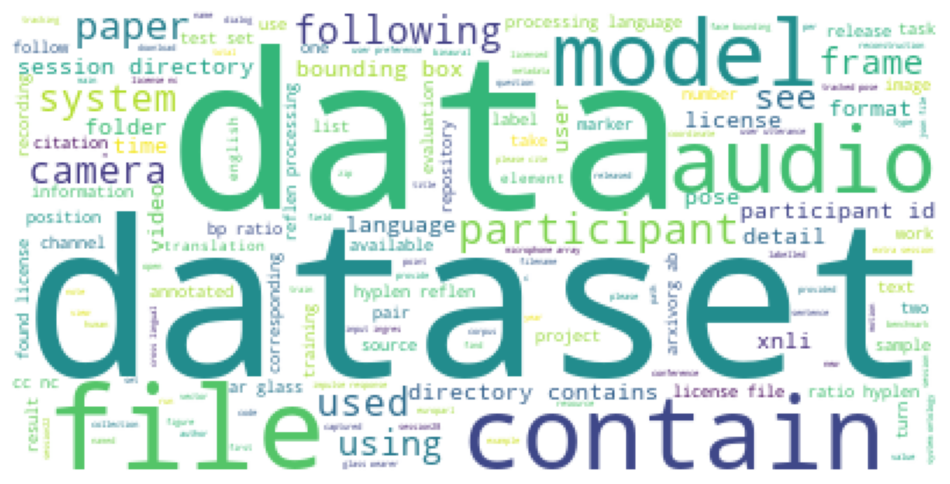

In [307]:
# Word Cloud for markdown words
mark_cloud = WordCloud(background_color='white').generate(mark_words)
plt.figure(figsize=(12, 8))
plt.imshow(mark_cloud)
plt.axis('off')
plt.show()

In [308]:
# Bigrams!
all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2)))
py_bigrams = (pd.Series(nltk.ngrams(py_words.split(), 2)))
c_bigrams = (pd.Series(nltk.ngrams(c_words.split(), 2)))
mark_bigrams = (pd.Series(nltk.ngrams(mark_words.split(), 2)))

# Top 20 most common bigrams
top_20_all_bigrams = all_bigrams.value_counts().head(20)
top_20_py_bigrams = py_bigrams.value_counts().head(20)
top_20_c_bigrams = c_bigrams.value_counts().head(20)
top_20_mark_bigrams = mark_bigrams.value_counts().head(20)

In [312]:
word_freq.head()

py_freq    c_freq  mark_freq  all_freq
model     1.428353  0.687876   0.522916  1.317491
python    0.833907  0.538535   0.061520  0.771647
data      0.824216  0.457076   1.599508  0.797144
training  0.670441  0.366566   0.194812  0.602346
file      0.638309  0.534009   1.209884  0.644365

<Axes: >

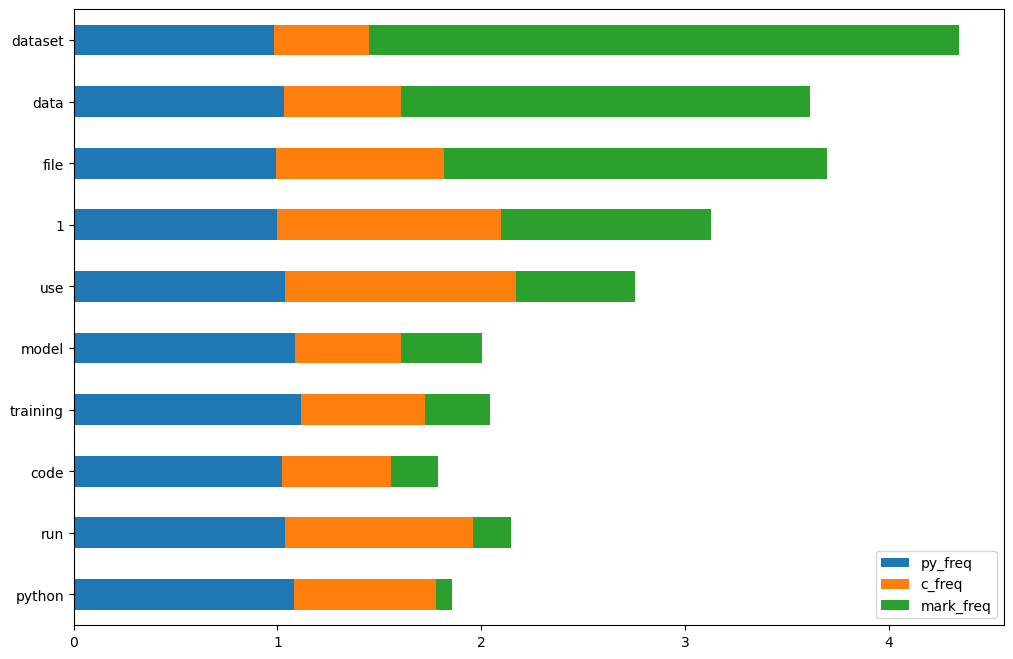

In [318]:
# Visualize language bigrams as percent of all word counts
(word_freq.sort_values(by='all_freq', ascending=False)
    .head(10)
    .apply(lambda row: row / row['all_freq'], axis=1)
    .drop(columns=['all_freq'])
    .sort_values(by='mark_freq')
    .plot.barh(stacked=True, figsize=(12, 8)))

In [ ]:
# Trigrams!
all_trigrams = (pd.Series(nltk.ngrams(all_words.split(), 3)))
py_trigrams = (pd.Series(nltk.ngrams(py_words.split(), 3)))
c_trigrams = (pd.Series(nltk.ngrams(c_words.split(), 3)))
mark_trigrams = (pd.Series(nltk.ngrams(mark_words.split(), 3)))

# Top 20 most common trigrams
top_20_all_trigrams = all_trigrams.value_counts().head(20)
top_20_py_trigrams = py_trigrams.value_counts().head(20)
top_20_c_trigrams = c_trigrams.value_counts().head(20)
top_20_mark_trigrams = mark_trigrams.value_counts().head(20)

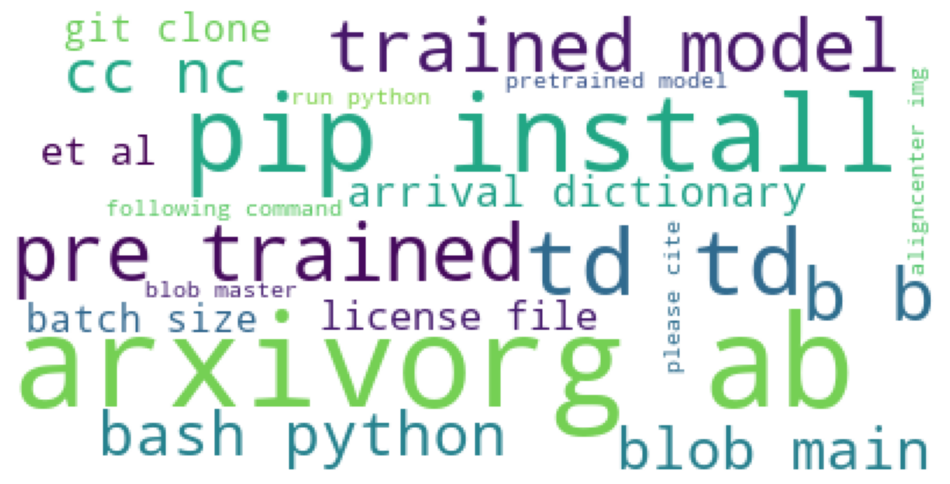

In [ ]:
# Word Cloud for all bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

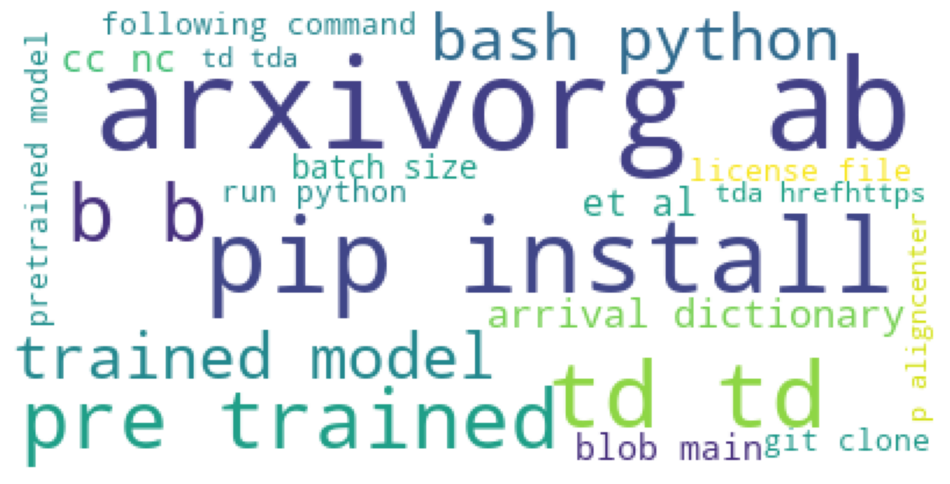

In [ ]:
# Word Cloud for py bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_py_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

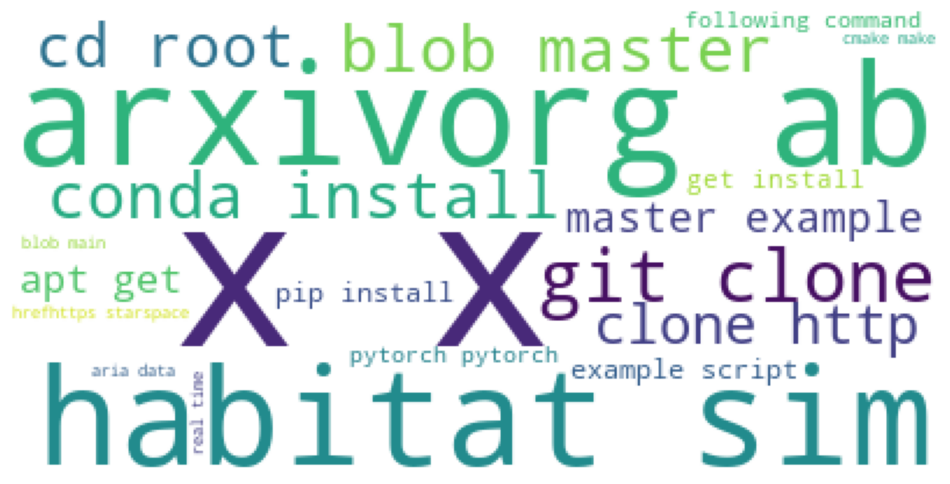

In [ ]:
# Word Cloud for c bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_c_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

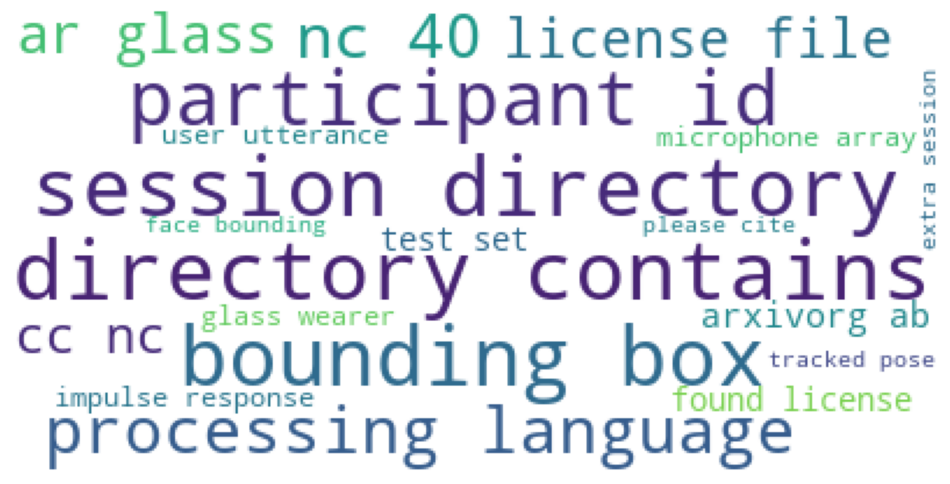

In [ ]:
# Word Cloud for mark bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_mark_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

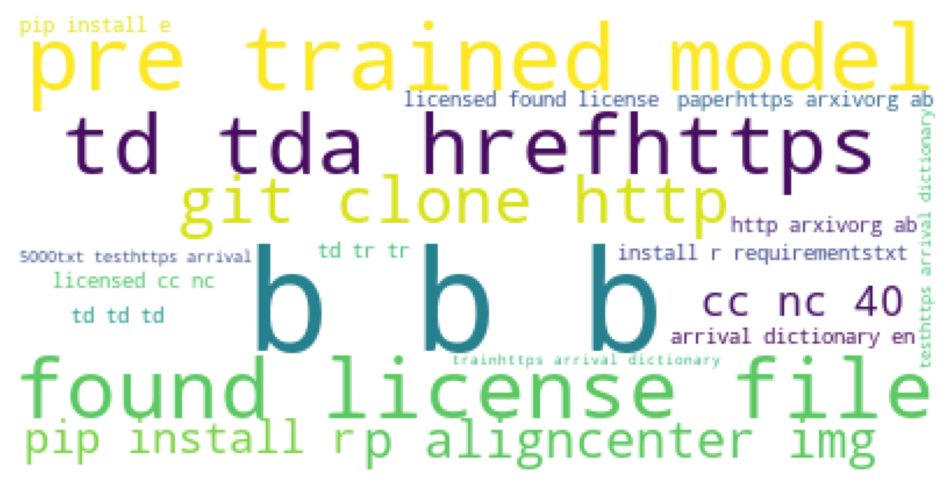

In [ ]:
# Word Cloud for all trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_all_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

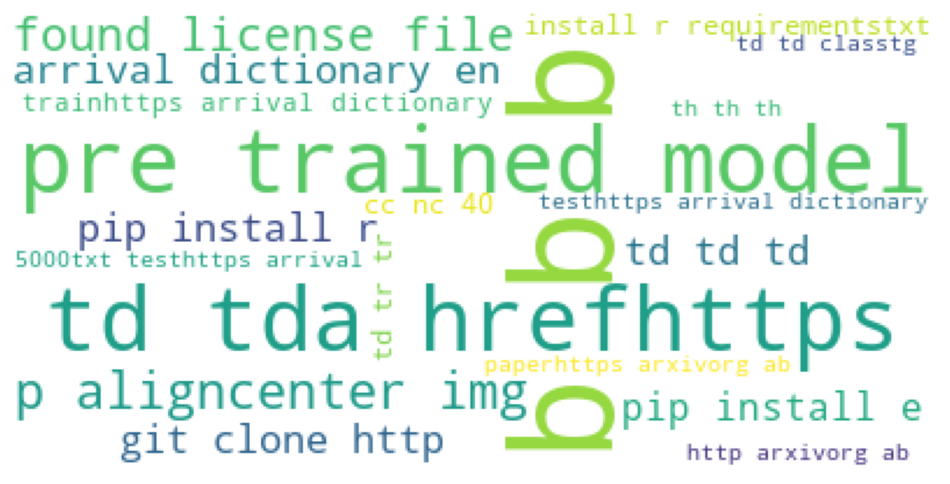

In [ ]:
# Word Cloud for py trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_py_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

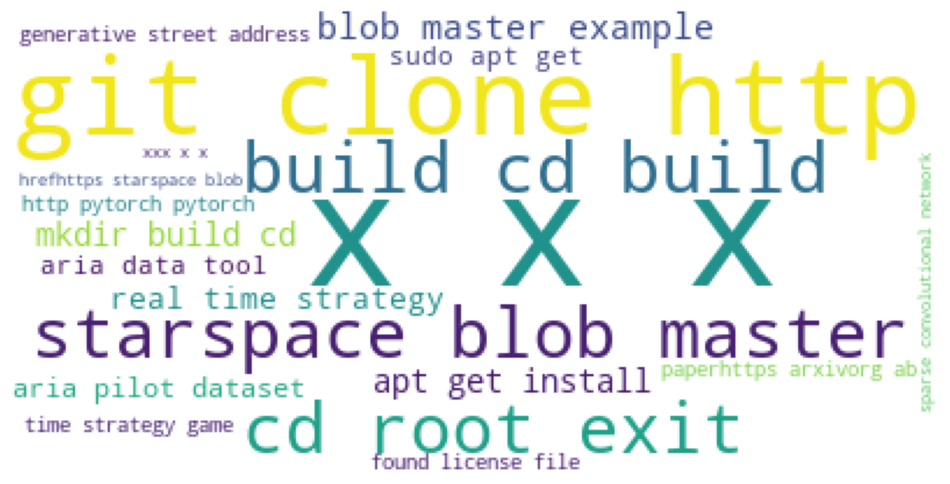

In [ ]:
# Word Cloud for c trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_c_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

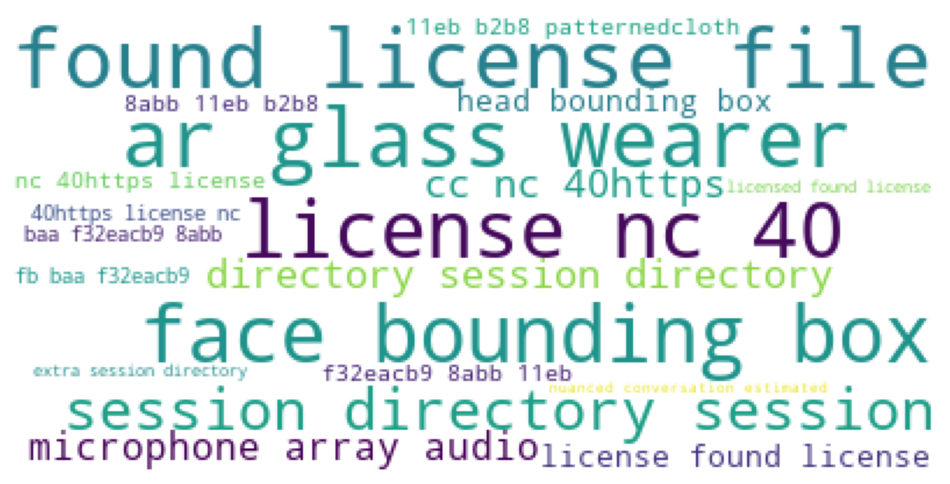

In [ ]:
# Word Cloud for mark trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_mark_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

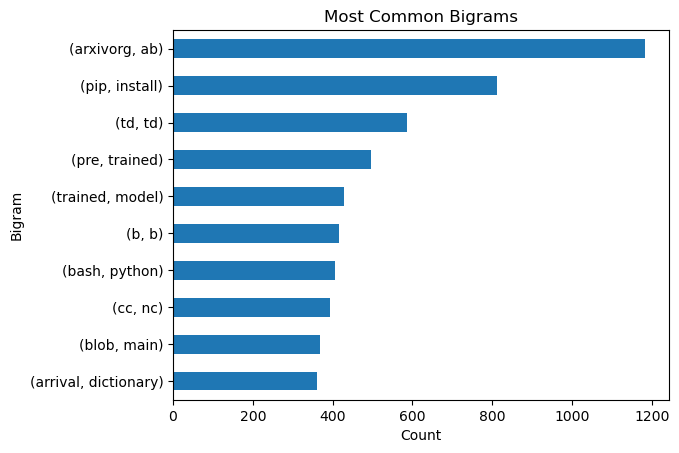

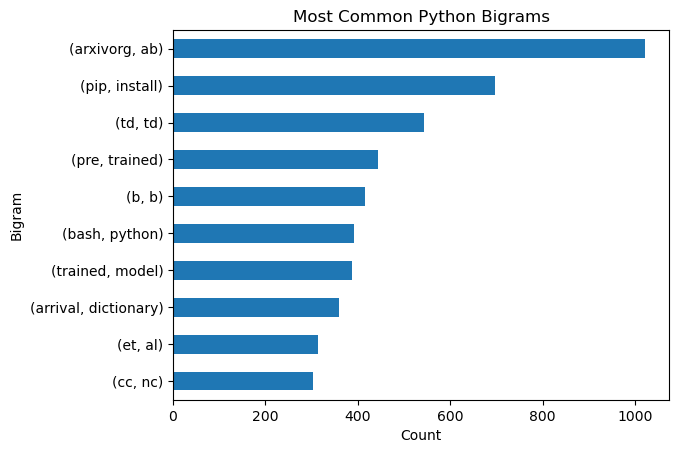

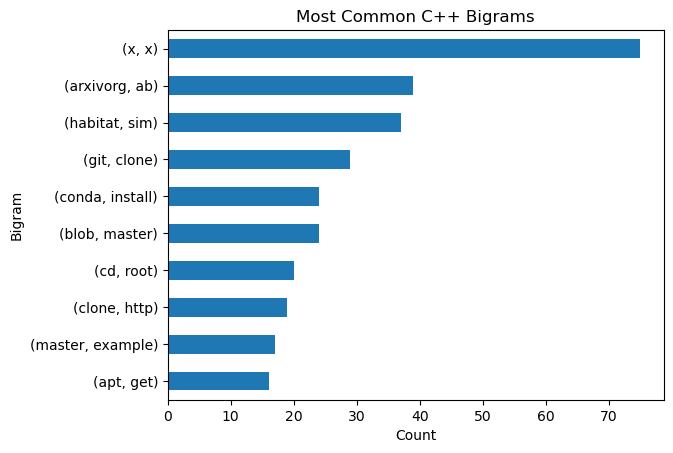

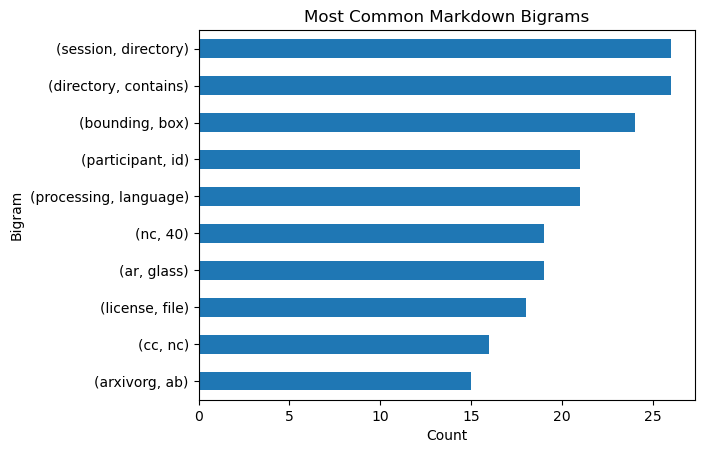

In [ ]:
top_20_all_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Bigrams')
plt.show()

top_20_py_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Python Bigrams')
plt.show()

top_20_c_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common C++ Bigrams')
plt.show()

top_20_mark_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Markdown Bigrams')
plt.show()

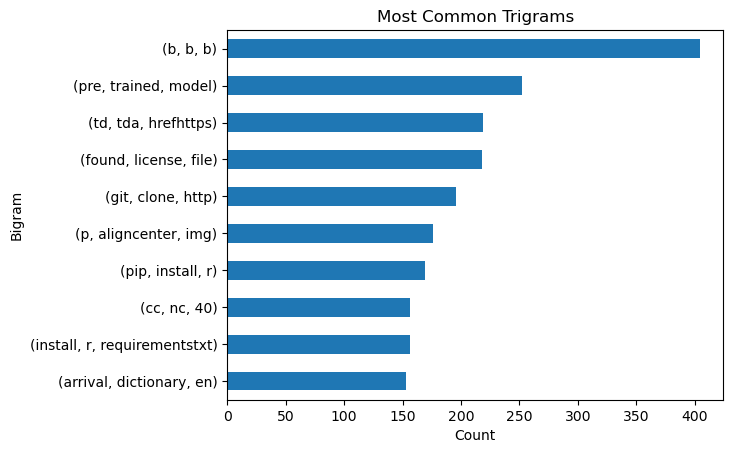

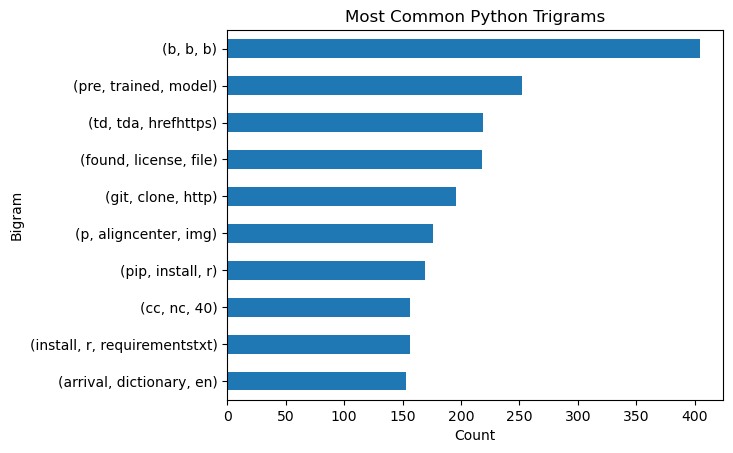

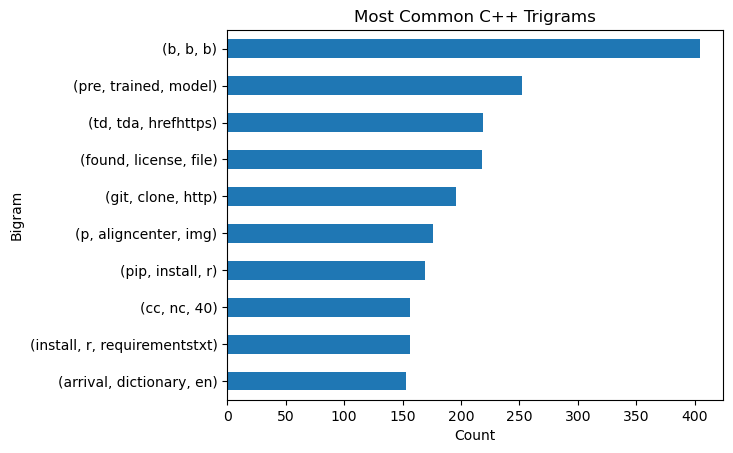

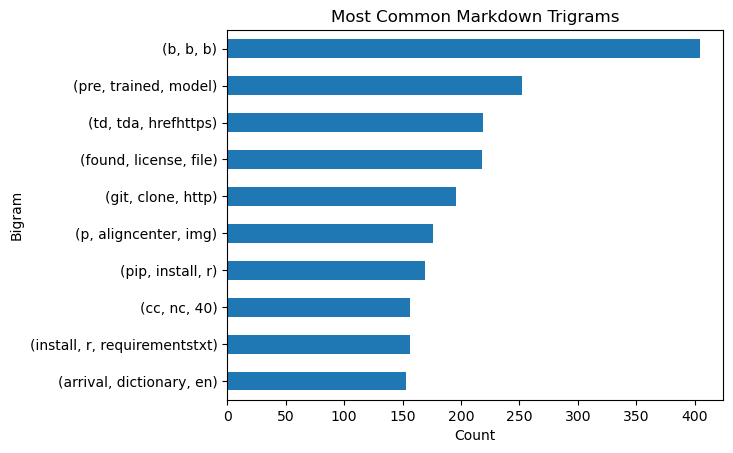

In [319]:
top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Python Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common C++ Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Markdown Trigrams')
plt.show()

## Modeling

### Feature Extraction:  TF-IDF

- **TF**: Term Frequency; how often a word appears in a document.
- **IDF**: Inverse Documnet Frequency; a measure based on in how many documents will a word appear.
- **TF-IDF**: A combination of the two measures above.